# TRAIN SCALER REGRESSOR MODELS
THE DATA IS TRANSFOMED APPLYING MINMAXSCALER AND THEN THE MODELS WERE TRAINED

The goal is train regressor models and save the pkl with the models.
In the future notebooks with the datasets and the models, these will be evaluated


### obs: all the models loaded are the models that can be used in gurobi-py (this codes are generated to train models that the ds can undertand completly its behavior to add as constraint in optimization model)

SOURCES: https://gurobi-machinelearning.readthedocs.io/en/stable/auto_generated/gurobi_ml.sklearn.gradient_boosting_regressor.html

- Linear Regression (Linear Regression, Ridge, Lasso)
  
- Decission Tree
  
- Gradient Boosting Regressor

- Random Forest
  
- Xtreme Gradient Boosting
  
- Neural Network - Multi layer Perceptron


### obs: gurobi to accept the models need to have the feature eng and the training model in the same only model(artifact). So it is neccesary to use the method Pipeline

### obs 2: All the codes are modified adding the scaler transformation and save in the correct folder

In [1]:
import os
# fix root path to save outputs
actual_path = os.path.abspath(os.getcwd())
list_root_path = actual_path.split('\\')[:-1]
root_path = '\\'.join(list_root_path)
os.chdir(root_path)
print('root path: ', root_path)

root path:  D:\github-mi-repo\Offline-Evaluation-ML-Regression


## RUN
Train each model independiently (some models with different hp) and save each model in one folder (artifacts/models)

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

# pipeline
from sklearn.pipeline import Pipeline

# transform
from sklearn.preprocessing import MinMaxScaler

# models
from sklearn.linear_model import LinearRegression # lr
from sklearn.linear_model import Ridge # ridge
from sklearn.linear_model import Lasso # lasso
from sklearn.tree import DecisionTreeRegressor # tree
from sklearn.ensemble import GradientBoostingRegressor #gb
from sklearn.ensemble import RandomForestRegressor #rf
from xgboost import XGBRegressor # xgb
from  sklearn.neural_network import MLPRegressor # mlp

# plot trees
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
import subprocess
import xgboost as xgb

### 0. Global params

In [3]:
# define folder where the models were saved. There are the same models accepted by gurobi but the feature eng changed
folder_models = 'scaler'

### 1. load data

In [4]:
### DEFINE LIST FEARTURES - TARGET (order data to have the same order in the features always)
list_features = ['AveOccup', 'Latitude', 'Population', 'AveBedrms', 'HouseAge', 'Longitude', 'AveRooms', 'MedInc']

In [5]:
### LOAD DATA
X_train = pd.read_pickle('artifacts/data/X_train.pkl')
X_test = pd.read_pickle('artifacts/data/X_test.pkl')
y_train = pd.read_pickle('artifacts/data/y_train.pkl')
y_test = pd.read_pickle('artifacts/data/y_test.pkl')

In [6]:
print('shape data')
print('\n\n TRAIN')
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)

print('\n\n TEST')
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

shape data


 TRAIN
X_train:  (14540, 8)
y_train:  (14540, 1)


 TEST
X_test:  (3636, 8)
y_test:  (3636, 1)


### 2.1 lr

In [7]:
# train
lr_model = LinearRegression()

lr = Pipeline([
    ('scaler', MinMaxScaler() ), 
    ('lr',  lr_model)
])

lr.fit(X_train, y_train)


# save
path_model = f'artifacts/models/{folder_models}/lr.pkl'
with open(path_model, 'wb') as f:
    pickle.dump(lr, f)

### 2.2 Ridge
- L2
- Conserve the features. Coeficients not zero. Use all the features

In [8]:
# train
ridge_model = Ridge()

ridge = Pipeline([
    ('scaler', MinMaxScaler() ), 
    ('ridge',  ridge_model)
])

ridge.fit(X_train, y_train)


# save
path_model = f'artifacts/models/{folder_models}/ridge.pkl'
with open(path_model, 'wb') as f:
    pickle.dump(ridge, f)

### 2.3 Lasso
- L1
- Trend to transform the coeficients to zero. Conserve only the most important features

In [9]:
# train
lasso_model = Lasso()

lasso = Pipeline([
    ('scaler', MinMaxScaler() ), 
    ('lasso',  lasso_model)
])

lasso.fit(X_train, y_train)


# save
path_model = f'artifacts/models/{folder_models}/lasso.pkl'
with open(path_model, 'wb') as f:
    pickle.dump(lasso, f)

### 3.1. tree_simple

In [10]:
# train
tree_simple_model = DecisionTreeRegressor(random_state = 42,
                                   min_samples_split = 0.2,
                                    min_samples_leaf = 0.1
                                   #max_depth = 2
                                   )

tree_simple = Pipeline([
    ('scaler', MinMaxScaler() ), 
    ('tree_simple', tree_simple_model )
])

tree_simple.fit(X_train, y_train)


# save
path_model = f'artifacts/models/{folder_models}/tree_simple.pkl'
with open(path_model, 'wb') as f:
    pickle.dump(tree_simple, f)

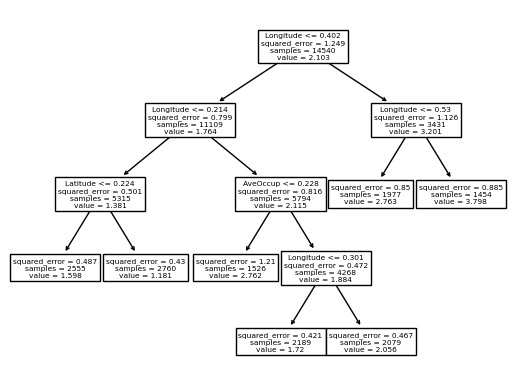

In [11]:
#### WITH THE MODELS ARE IN A PIPELINE, IT IS NECCESARY TO ACCESS ONLY THE TREE

from sklearn import set_config
set_config(display='diagram')
from sklearn.tree import plot_tree

# Accede al estimador del pipeline
tree_simple_instance = tree_simple.named_steps['tree_simple']

# Luego, utiliza plot_tree con el estimador
plot_tree(tree_simple_instance, feature_names = list_features)

plt.savefig(f'artifacts/models_fig/{folder_models}/tree_simple.png', dpi = 300)

### 3.2. tree_default

In [12]:
# train
tree_default_model = DecisionTreeRegressor(random_state = 42)

tree_default = Pipeline([
    ('scaler', MinMaxScaler() ), 
    ('tree_default',  tree_default_model)
])

tree_default.fit(X_train, y_train)


# save
path_model = f'artifacts/models/{folder_models}/tree_default.pkl'
with open(path_model, 'wb') as f:
    pickle.dump(tree_default, f)


# show tree trained
#plot_tree(tree_default)

### 4.1 rf_simple

In [13]:
# train
param_n_trees = 3
rf_simple_model = RandomForestRegressor(n_estimators = param_n_trees,
                                  random_state = 42,
                                 min_samples_split = 0.2,
                                    min_samples_leaf = 0.1)
                                   #max_depth = 2)

rf_simple = Pipeline([
    ('scaler', MinMaxScaler() ), 
    ('rf_simple',  rf_simple_model)
])

rf_simple.fit(X_train, y_train)


# save
path_model = f'artifacts/models/{folder_models}/rf_simple.pkl'
with open(path_model, 'wb') as f:
    pickle.dump(rf_simple, f)


# show tree trained
# fig, axes = plt.subplots(nrows = 1, ncols = param_n_trees, figsize = (10,2), dpi=900)
# for index in range(0, param_n_trees):
#     plot_tree(rf_simple.estimators_[index],
#                     feature_names = list_features,
#                    filled = True,
#                    ax = axes[index])
#     axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
# fig.savefig(f'artifacts/models_fig/{folder_models}/rf_simple.png', dpi = 300)

### 4.2 rf_default

In [14]:
# train
rf_default_model = RandomForestRegressor(random_state = 42)

rf_default = Pipeline([
    ('scaler', MinMaxScaler() ), 
    ('rf_default',  rf_default_model)
])

rf_default.fit(X_train, y_train)


# save
path_model = f'artifacts/models/{folder_models}/rf_default.pkl'
with open(path_model, 'wb') as f:
    pickle.dump(rf_default, f)

### 5.1. gb_simple

In [15]:
# train
param_n_estimators = 3
gb_simple_model = GradientBoostingRegressor(random_state=0,
                                     n_estimators = param_n_estimators,
                                      min_samples_split = 0.2,
                                    min_samples_leaf = 0.1,
                                    #max_depth = 2)
                                     )

gb_simple = Pipeline([
    ('scaler', MinMaxScaler() ), 
    ('gb_simple',  gb_simple_model)
])

gb_simple.fit(X_train, y_train)


# save
path_model = f'artifacts/models/{folder_models}/gb_simple.pkl'
with open(path_model, 'wb') as f:
    pickle.dump(gb_simple, f)


# # show tree trained
# fig, axes = plt.subplots(nrows = 1, ncols = param_n_estimators, figsize = (10,2), dpi=900)
# for index in range(0, param_n_estimators):
#     plot_tree(gb_simple[index][0],
#                     feature_names = list_features,
#                    filled = True,
#                    ax = axes[index])
#     axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
# fig.savefig(f'artifacts/models_fig/{folder_models}/gb_simple.png', dpi = 300)

### 5.2 gb_default

In [16]:
# train
gb_default_model = GradientBoostingRegressor(random_state = 42)

gb_default = Pipeline([
    ('scaler', MinMaxScaler() ), 
    ('gb_default',  gb_default_model)
])

gb_default.fit(X_train, y_train)


# save
path_model = f'artifacts/models/{folder_models}/gb_default.pkl'
with open(path_model, 'wb') as f:
    pickle.dump(gb_default, f)

### 6.1 xgb_simple

In [17]:
# train
param_n_estimators = 3
xgb_simple_model = XGBRegressor(random_state = 42,
                                     n_estimators = param_n_estimators,
                                      min_samples_split = 0.2,
                                    min_samples_leaf = 0.1,
                                    #max_depth = 2)
                                     )

xgb_simple = Pipeline([
    ('scaler', MinMaxScaler() ), 
    ('xgb_simple',  xgb_simple_model)
])


xgb_simple.fit(X_train, y_train)


# save
path_model = f'artifacts/models/{folder_models}/xgb_simple.pkl'
with open(path_model, 'wb') as f:
    pickle.dump(xgb_simple, f)


# show tree trained
# path graphviz
graphviz_path = 'D:/Graphviz/bin'
os.environ['PATH'] = f"{graphviz_path};{os.environ['PATH']}"

# show
# fig, axes = plt.subplots(nrows = 1, ncols = param_n_estimators, figsize = (10,2), dpi=900)
# for index in range(0, param_n_estimators):
#     #axes[index] = xgb.plot_tree(xgb_simple, num_trees = index, fill = True)
#     xgb.plot_tree(xgb_simple, num_trees = index, fill = True, ax=axes[index])
#     axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
# fig.savefig(f'artifacts/models_fig/{folder_models}/xgb_simple.png', dpi = 1300)

### 6.2 xgb_default

In [18]:
# train
xgb_default_model = XGBRegressor(random_state = 42)

xgb_default = Pipeline([
    ('scaler', MinMaxScaler() ), 
    ('xgb_default',  xgb_default_model)
])

xgb_default.fit(X_train, y_train)


# save
path_model = f'artifacts/models/{folder_models}/xgb_default.pkl'
with open(path_model, 'wb') as f:
    pickle.dump(xgb_default, f)

### 7.1 mlp_simple

In [19]:
# train
mlp_simple_model = MLPRegressor(random_state = 42, max_iter=500, hidden_layer_sizes = [5, 1])

mlp_simple = Pipeline([
    ('scaler', MinMaxScaler() ), 
    ('mlp_simple',  mlp_simple_model)
])

mlp_simple.fit(X_train, y_train)

# save
path_model = f'artifacts/models/{folder_models}/mlp_simple.pkl'
with open(path_model, 'wb') as f:
    pickle.dump(mlp_simple, f)

### 7.2 mlp_default

In [20]:
# train
mlp_default_model = MLPRegressor(random_state = 42, max_iter=500)

mlp_default = Pipeline([
    ('scaler', MinMaxScaler() ), 
    ('mlp_default',  mlp_default_model)
])

mlp_default.fit(X_train, y_train)

# save
path_model = f'artifacts/models/{folder_models}/mlp_default.pkl'
with open(path_model, 'wb') as f:
    pickle.dump(mlp_default, f)